In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
#import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [2]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True )

In [3]:

X_train, y_train = next(iter(train_data.batch(len(train_data))))

In [4]:
print(y_train,type(y_train))
print(X_train,type(X_train))

tf.Tensor([0 0 0 ... 1 0 0], shape=(15000,), dtype=int64) <class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the set

In [5]:
import pandas as pd
df=pd.DataFrame()
df['review']=X_train.numpy()
df['sentiment']=y_train.numpy()

In [6]:
df['review']=df['review'].str.decode(encoding='UTF-8')

In [7]:
df.describe()

sentiment
count  15000.000000
mean       0.499333
std        0.500016
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [8]:
df.head()

review  sentiment
0  This was an absolutely terrible movie. Don't b...          0
1  I have been known to fall asleep during films,...          0
2  Mann photographs the Alberta Rocky Mountains i...          0
3  This is the kind of film for a snowy Sunday af...          1
4  As others have mentioned, all the women that g...          1

In [9]:
from tensorflow.keras.utils import to_categorical
train_text=df.review.values
target=df.sentiment.values
y=to_categorical(target)
print(train_text.shape,target.shape,y.shape)

(15000,) (15000,) (15000, 2)


In [10]:
X_test, y_test = next(iter(test_data.batch(len(test_data))))

In [11]:
len(X_test)

25000

In [12]:
len(y_test)

25000

In [13]:
df_test=pd.DataFrame()
df_test['review']=X_test.numpy()
df_test['sentiment']=y_test.numpy()
df_test['review']=df_test['review'].str.decode(encoding='UTF-8')

In [14]:
from tensorflow.keras.utils import to_categorical
test_text=df_test.review.values
target_y=df_test.sentiment.values
y_test=to_categorical(target_y)
print(test_text.shape,target_y.shape,y_test.shape)

(25000,) (25000,) (25000, 2)


In [15]:
X_val, y_val = next(iter(validation_data.batch(len(validation_data))))

In [16]:
df_val=pd.DataFrame()
df_val['review']=X_val.numpy()
df_val['sentiment']=y_val.numpy()

In [17]:
df_val['review']=df_val['review'].str.decode(encoding='UTF-8')

In [18]:
from tensorflow.keras.utils import to_categorical
val_text=df_val.review.values
target_v=df_val.sentiment.values
y_val=to_categorical(target_v)
print(val_text.shape,target_v.shape,y_val.shape)

(10000,) (10000,) (10000, 2)


In [19]:
df_val.head()

review  sentiment
0  This was a superb episode, one of the best of ...          1
1  Four teenage girlfriends drive to Fort Laurdal...          1
2  David Duchovney creates a role that he was to ...          1
3  This, despite not being the original - it bega...          1
4  I recently saw I.Q. and even though I'm not a ...          1

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

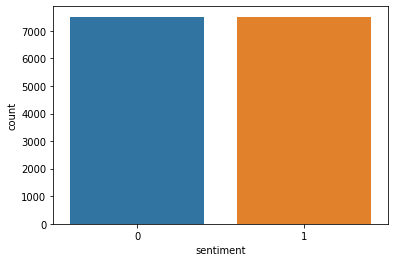

In [20]:
import seaborn as sns
sns.countplot(df['sentiment'])

In [21]:
#Text preeration
import re

In [22]:
stopwords=["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
stopwords.append('movie')
stopwords.append('film')

# to remove the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [23]:
#to remove non alphanumeric char
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9]'," ",text)

#to remove URLs:
def remove_url(text):
    url=re.compile(r'https?://\S+|www\.\s+')
    return url.sub(r"",text)


In [24]:

############## deta Cleaning ########################

df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(remove_url)
df['review'] = df['review'].apply(alpha_num)
df['review'] = df['review'].apply(remove_stopwords)


df_test['review']=df_test['review'].str.lower()
df_test['review'] = df_test['review'].apply(remove_url)
df_test['review'] = df_test['review'].apply(alpha_num)
df_test['review'] = df_test['review'].apply(remove_stopwords)


df_val['review'] = df_val['review'].str.lower()
df_val['review'] = df_val['review'].apply(remove_url)
df_val['review'] = df_val['review'].apply(alpha_num)
df_val['review'] = df_val['review'].apply(remove_stopwords)





In [25]:


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer=Tokenizer(num_words=15000)
tokenizer.fit_on_texts(train_text)



X_train=tokenizer.texts_to_sequences(train_text)
X_train=pad_sequences(X_train,padding="post",maxlen=256)

X_test=tokenizer.texts_to_sequences(test_text)
X_test=pad_sequences(X_test,padding="post",maxlen=256)

X_val=tokenizer.texts_to_sequences(val_text)
X_val=pad_sequences(X_val,padding="post",maxlen=256)



In [26]:
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)

60348


In [27]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D

from tensorflow.keras.optimizers import Adam
from keras.losses import binary_crossentropy


model=Sequential()
model.add(Embedding(60348,250,mask_zero=True))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 250)         15087000  
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         194048    
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 15,330,586
Trainable params: 15,330,586
Non-trainable params: 0
____________________________________________

In [28]:
history=model.fit(X_train,y,validation_data=(X_val,y_val),epochs=5,batch_size=100,verbose=1)

Epoch 1/5
150/150 [==============================] - 290s 2s/step - loss: 0.4078 - accuracy: 0.8107 - val_loss: 0.3042 - val_accuracy: 0.8768
Epoch 2/5
150/150 [==============================] - 317s 2s/step - loss: 0.1873 - accuracy: 0.9355 - val_loss: 0.3207 - val_accuracy: 0.8691
Epoch 3/5
150/150 [==============================] - 323s 2s/step - loss: 0.1079 - accuracy: 0.9642 - val_loss: 0.3965 - val_accuracy: 0.8675
Epoch 4/5
150/150 [==============================] - 319s 2s/step - loss: 0.0594 - accuracy: 0.9808 - val_loss: 0.4864 - val_accuracy: 0.8700
Epoch 5/5
150/150 [==============================] - 331s 2s/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.4919 - val_accuracy: 0.8586


In [37]:
y_pred=model.predict(X_test)

In [38]:
y_pred

array([[4.0555101e-06, 9.9999595e-01],
       [4.1896958e-05, 9.9995816e-01],
       [3.4212288e-02, 9.6578771e-01],
       ...,
       [9.9999905e-01, 9.8160695e-07],
       [1.6140483e-06, 9.9999833e-01],
       [3.6208121e-06, 9.9999642e-01]], dtype=float32)

In [50]:
y_p=[]
for i in range(len(y_pred)):
    y_p.append(np.argmax(y_pred[i]))

In [52]:
y_p=np.array(y_p)

In [53]:
from sklearn.metrics import confusion_matrix

In [55]:
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [56]:
confusion_matrix(y_p,target_y)

array([[10354,  1741],
       [ 2146, 10759]], dtype=int64)

In [57]:
#14% recall and 16% precision
from sklearn.metrics import accuracy_score
accuracy_score(y_p,target_y)

0.84452

In [66]:
from collections import Counter
Counter(y_p)

Counter({1: 12905, 0: 12095})